# World-Population-Analysis

# Data Collection

In [28]:
import pandas as pd

# Load dataset (replace 'world_population.csv' with the actual filename)
data = pd.read_csv('world_population.csv')

# Display basic info about the dataset
print(data.info())
print(data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         234 non-null    int64  
 1   CCA3                         234 non-null    object 
 2   Country/Territory            234 non-null    object 
 3   Capital                      234 non-null    object 
 4   Continent                    234 non-null    object 
 5   2022 Population              234 non-null    int64  
 6   2020 Population              234 non-null    int64  
 7   2015 Population              234 non-null    int64  
 8   2010 Population              234 non-null    int64  
 9   2000 Population              234 non-null    int64  
 10  1990 Population              234 non-null    int64  
 11  1980 Population              234 non-null    int64  
 12  1970 Population              234 non-null    int64  
 13  Area (km²)          

# Data Preprocessing

In [29]:
# Check for missing values and duplicates
print(data.isna().sum())  # Missing values
print(f"Duplicates: {data.duplicated().sum()}")  # Duplicates

# Drop unnecessary columns
data = data.drop(['CCA3', 'Capital'], axis=1)

# Create new features
data['Growth Rate (%)'] = data['2022 Population'] / data['2020 Population'] * 100 - 100
data['Area per Person'] = data['Area (km²)'] / data['2022 Population']

# Verify the new dataset
print(data.info())
print(data.head())


Rank                           0
CCA3                           0
Country/Territory              0
Capital                        0
Continent                      0
2022 Population                0
2020 Population                0
2015 Population                0
2010 Population                0
2000 Population                0
1990 Population                0
1980 Population                0
1970 Population                0
Area (km²)                     0
Density (per km²)              0
Growth Rate                    0
World Population Percentage    0
dtype: int64
Duplicates: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         234 non-null    int64  
 1   Country/Territory            234 non-null    object 
 2   Continent                    234 non-null    object 
 3   2022 Populat

# Exploratory Data Analysis (EDA)

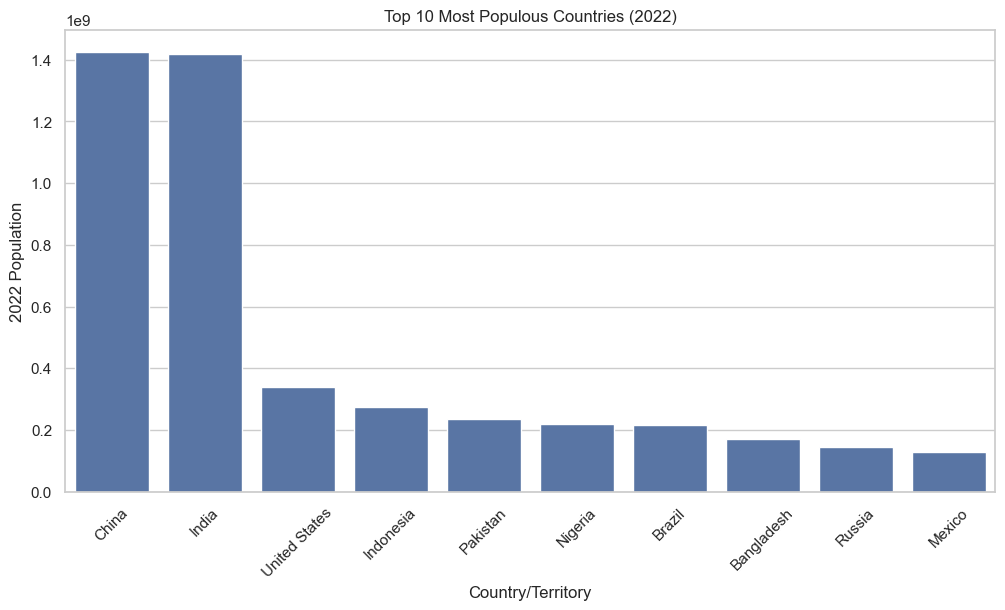

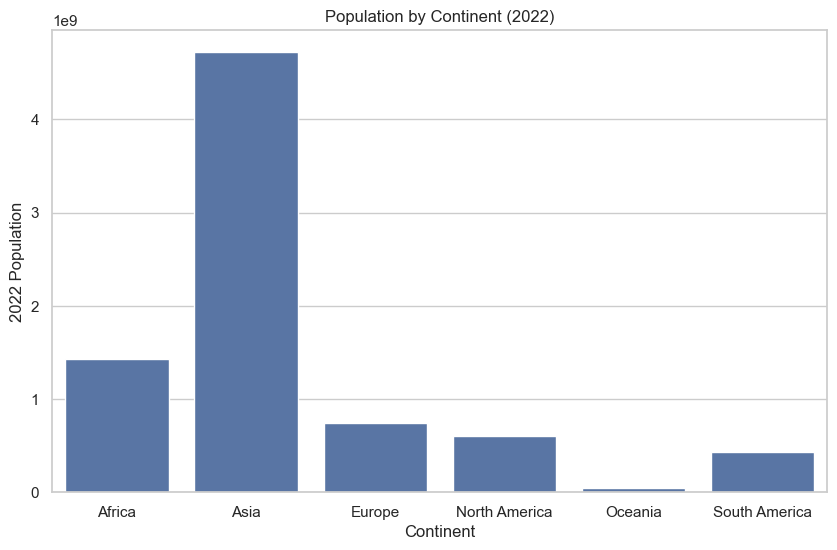

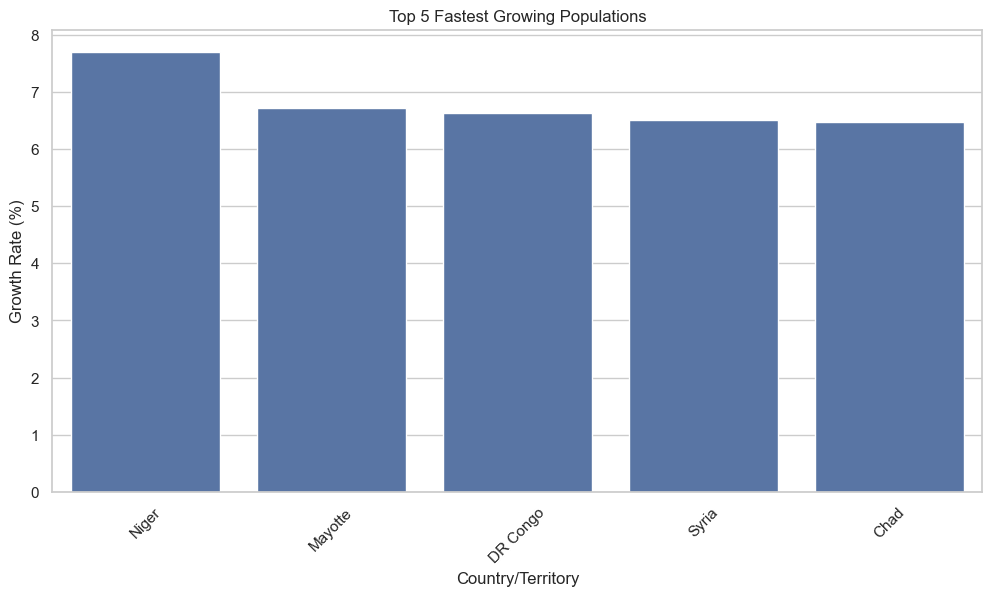

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up plot style
sns.set(style="whitegrid")

# Top 10 most populous countries (2022)
top_10_populous = data.nlargest(10, '2022 Population')

plt.figure(figsize=(12, 6))
sns.barplot(x='Country/Territory', y='2022 Population', data=top_10_populous)
plt.xticks(rotation=45)
plt.title('Top 10 Most Populous Countries (2022)')
plt.show()

# Population distribution across continents
continent_population = data.groupby('Continent')['2022 Population'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Continent', y='2022 Population', data=continent_population)
plt.title('Population by Continent (2022)')
plt.show()

# Population Growth Rates (Top 5 fastest-growing countries)
top_growth = data.nlargest(5, 'Growth Rate (%)')

plt.figure(figsize=(12, 6))
sns.barplot(x='Country/Territory', y='Growth Rate (%)', data=top_growth)
plt.xticks(rotation=45)
plt.title('Top 5 Fastest Growing Populations')
plt.show()


# Feature Engineering

In [31]:
# 1. Add Population Growth Rate for the last two years
data['Growth Rate (%)'] = (data['2022 Population'] - data['2020 Population']) / data['2020 Population'] * 100

# 2. Add Decade-based Population Averages
data['Avg Population (2010-2020)'] = data[['2010 Population', '2020 Population']].mean(axis=1)
data['Avg Population (2000-2010)'] = data[['2000 Population', '2010 Population']].mean(axis=1)

# 3. Normalize Density and Area
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data[['Normalized Density', 'Normalized Area']] = scaler.fit_transform(data[['Density (per km²)', 'Area (km²)']])

# Display the new columns
print(data[['Country/Territory', 'Growth Rate (%)', 'Avg Population (2010-2020)', 'Normalized Density']].head())


  Country/Territory  Growth Rate (%)  Avg Population (2010-2020)  \
0       Afghanistan         5.533532                  33580951.0   
1           Albania        -0.855573                   2890124.0   
2           Algeria         3.340629                  39654005.0   
3    American Samoa        -4.148174                     50519.0   
4           Andorra         2.733591                     74609.5   

   Normalized Density  
0            0.002720  
1            0.004266  
2            0.000812  
3            0.009600  
4            0.007360  


# Model Building

Mean Squared Error (MSE): 6571910830688.411
R^2 Score: 0.9982893090351002


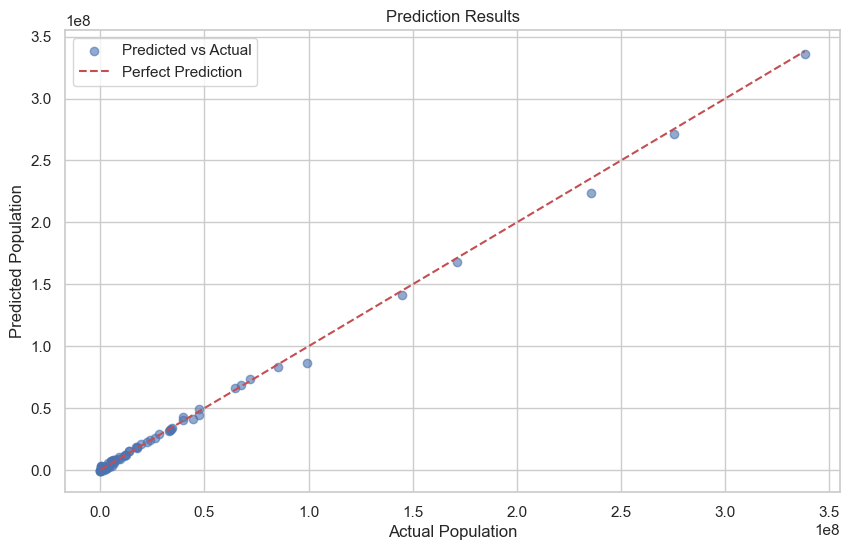

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# 1. Define features and target
features = ['Growth Rate (%)', 'Density (per km²)', 'Avg Population (2010-2020)', 'Area (km²)']
target = '2022 Population'

X = data[features]
y = data[target]

# 2. Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# 5. Predict and evaluate
y_pred = model.predict(X_test_scaled)

# Evaluation metrics
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

# Visualize predictions
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction')
plt.xlabel('Actual Population')
plt.ylabel('Predicted Population')
plt.title('Prediction Results')
plt.legend()
plt.show()


# Save the Data Preprocessing and Model Code

In [33]:
import joblib

# Save the model and scaler
joblib.dump(model, 'World_Population_Analysis.pkl')
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']